In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
df=pd.read_csv("concrete_data.csv")

In [3]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [5]:
df.size
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:xlabel='cement'>

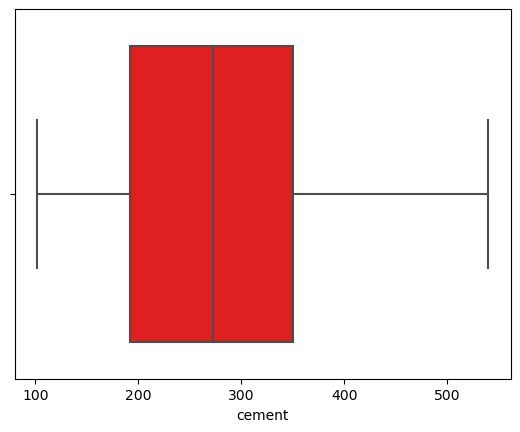

In [6]:
sns.boxplot(df["cement"],color='red') # no putliers

<AxesSubplot:xlabel='blast_furnace_slag'>

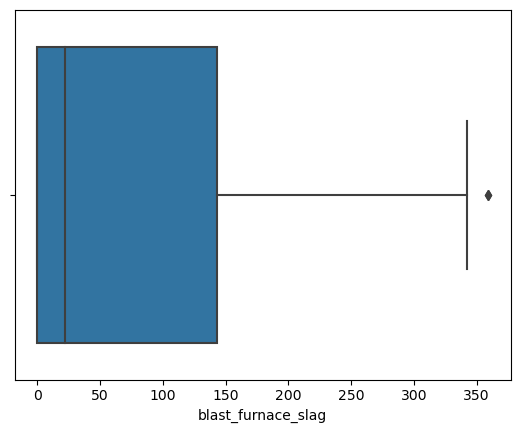

In [7]:
sns.boxplot(df.blast_furnace_slag) # look like an outliers

<AxesSubplot:xlabel='fly_ash'>

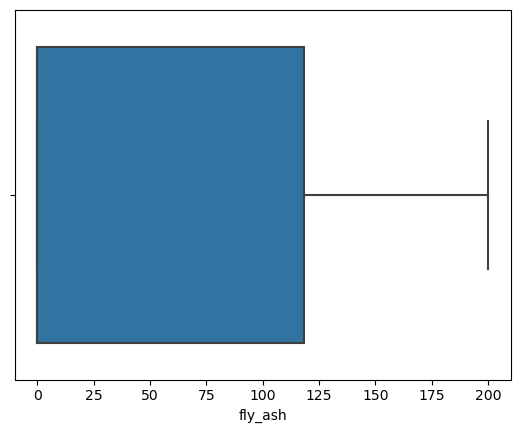

In [8]:
sns.boxplot(df.fly_ash) 

<AxesSubplot:xlabel='water'>

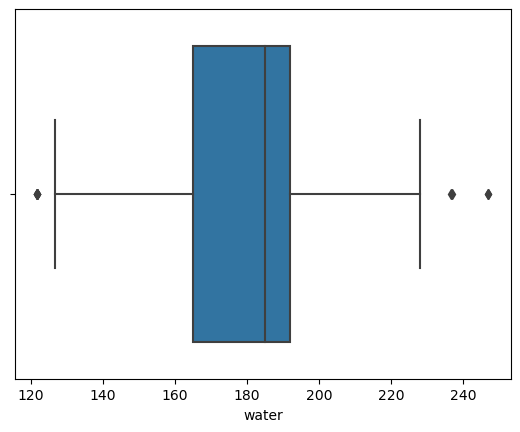

In [9]:
sns.boxplot(df.water) 

In [10]:
df.water.value_counts()

192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
195.4      1
211.5      1
175.8      1
200.3      1
200.6      1
Name: water, Length: 195, dtype: int64

In [11]:
df.water.quantile([0.01,0.02,0.03,0.05,0.10,0.20,0.30,0.95,0.96,0.97,0.98,0.99,0.999,1])

0.010    127.0870
0.020    140.8000
0.030    143.3000
0.050    146.1000
0.100    154.6000
0.200    162.0000
0.300    170.0000
0.950    228.0000
0.960    228.0000
0.970    228.0000
0.980    228.0000
0.990    228.0000
0.999    246.6129
1.000    247.0000
Name: water, dtype: float64

In [12]:
thresold1=df.water.quantile(0.02)
thresold2=df.water.quantile(0.999)

In [13]:
df=df[df.water<thresold2]

In [14]:
df=df[df.water>thresold1]

In [15]:
df.shape # only 25 rows deleted

(1005, 9)

<AxesSubplot:xlabel='superplasticizer'>

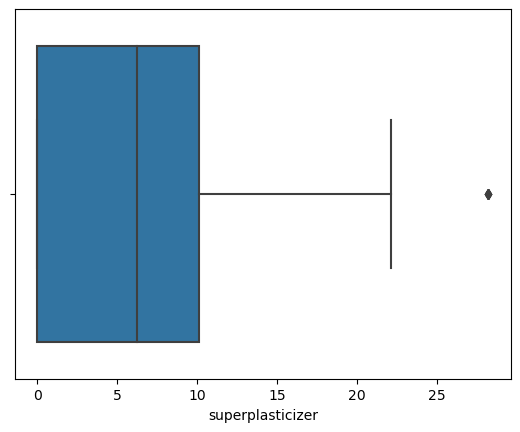

In [16]:
sns.boxplot(df.superplasticizer)

In [17]:
for x in ['superplasticizer']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    #min = q25-(1.5*intr_qr)
 
    #df.loc[BIKE[x] < min,x] =np.nan
    df.loc[df[x] > max,x] = np.nan

In [18]:
df.dropna(subset='superplasticizer', inplace=True)

In [19]:
df.shape # 5 rows deleted

(1000, 9)

<AxesSubplot:xlabel='coarse_aggregate'>

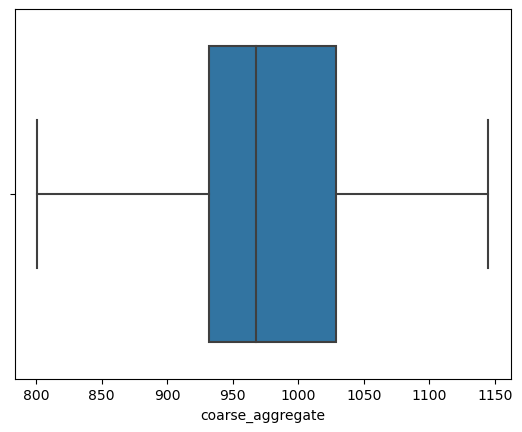

In [20]:
sns.boxplot(df.coarse_aggregate)

<AxesSubplot:xlabel='fine_aggregate '>

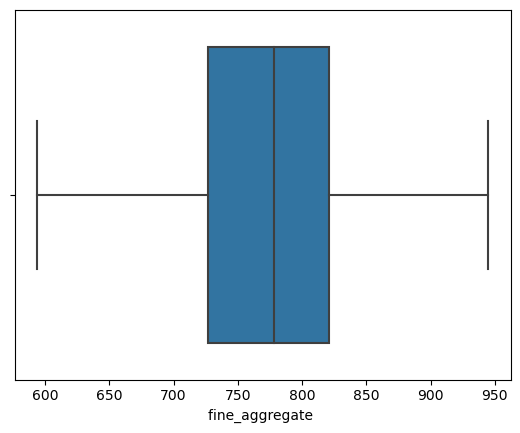

In [21]:
sns.boxplot(df["fine_aggregate "])

<AxesSubplot:xlabel='age'>

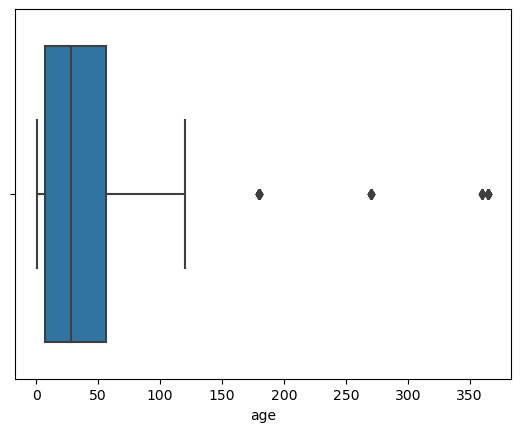

In [22]:
sns.boxplot(df.age)

In [23]:
for x in ["age"]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    #min = q25-(1.5*intr_qr)
 
    #df.loc[BIKE[x] < min,x] =np.nan
    df.loc[df[x] > max,x] = np.nan

In [24]:
df.dropna(subset='age', inplace=True)

In [25]:
df.shape # 59rows deleted, total rows deletd=89

(941, 9)

<AxesSubplot:xlabel='concrete_compressive_strength'>

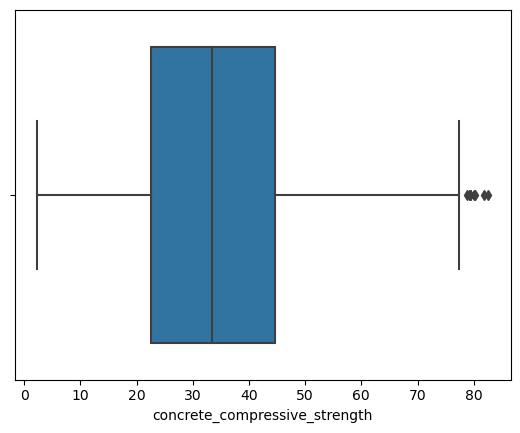

In [26]:
sns.boxplot(df.concrete_compressive_strength)

In [27]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [28]:
for x in ["concrete_compressive_strength"]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    #min = q25-(1.5*intr_qr)
 
    #df.loc[BIKE[x] < min,x] =np.nan
    df.loc[df[x] > max,x] = np.nan

In [29]:
df.dropna(subset='concrete_compressive_strength', inplace=True)

In [30]:
df.shape # 10 more rows deleted after removing outliers


(931, 9)

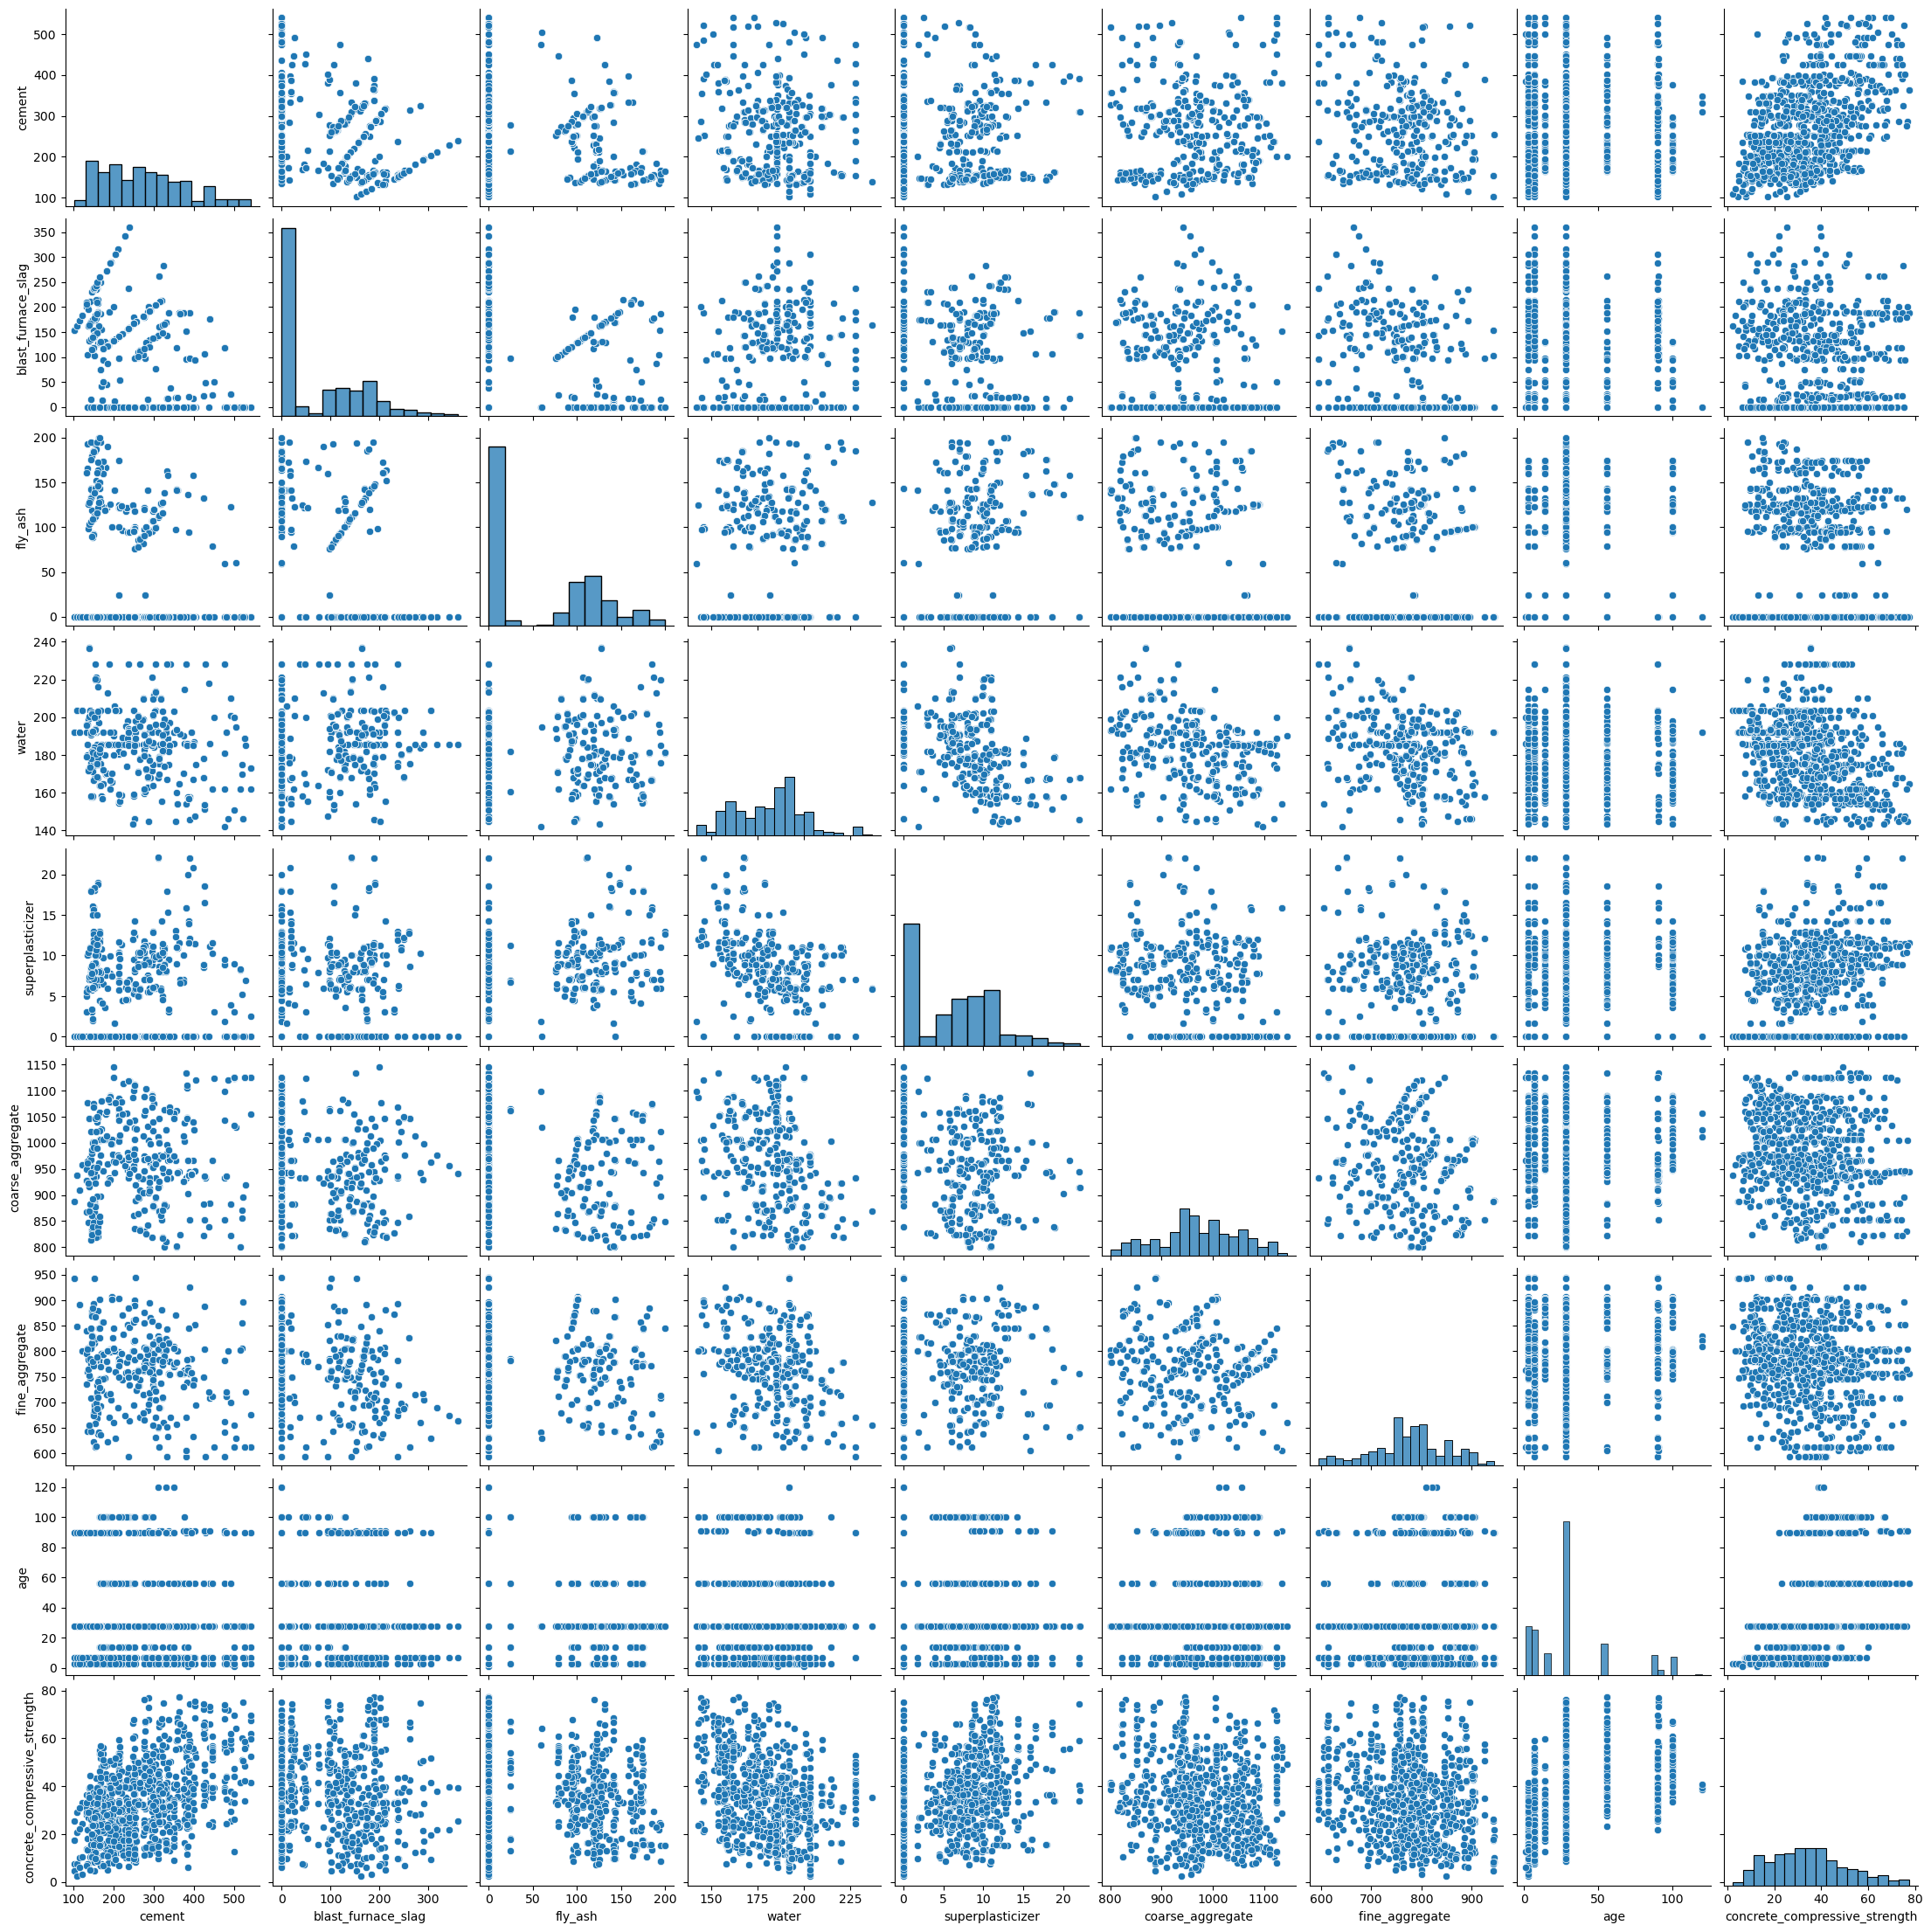

In [31]:
sns.pairplot(df)

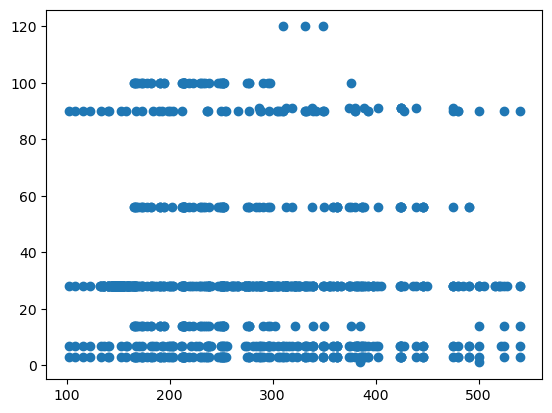

In [32]:
plt.scatter(x=df["cement"],y=df["age"])

In [33]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29


In [34]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,274.700322,74.158861,58.252954,181.243716,6.156176,974.025456,775.929968,32.034372,34.466348
std,101.881918,87.377041,64.413472,18.512161,5.320396,77.816686,75.758828,28.332187,16.186036
min,102.000000,0.000000,0.000000,142.000000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.300000,0.000000,0.000000,165.600000,0.000000,932.000000,738.000000,7.000000,22.495000
50%,255.000000,20.000000,0.000000,185.000000,6.700000,968.000000,779.300000,28.000000,33.360000
75%,339.200000,145.000000,118.300000,192.000000,10.150000,1029.400000,823.100000,28.000000,44.315000
max,540.000000,359.400000,200.100000,237.000000,22.100000,1145.000000,945.000000,120.000000,77.300000


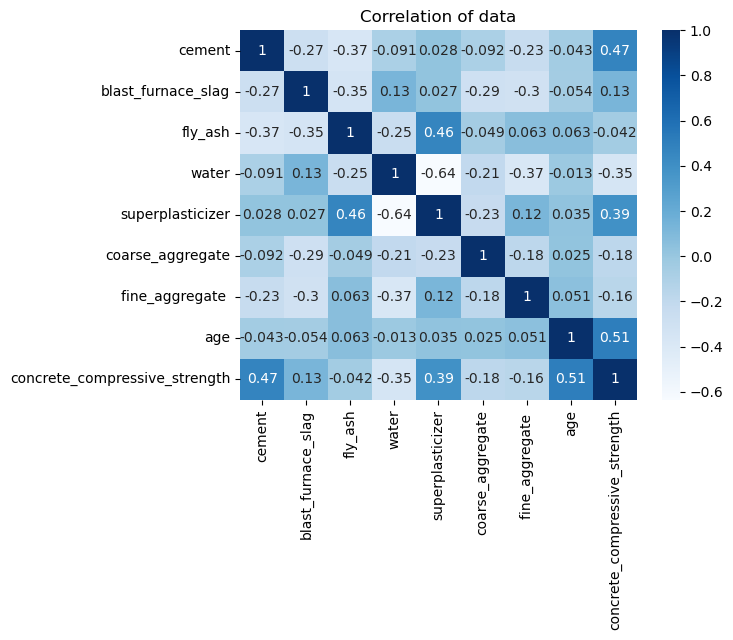

In [35]:
sns.heatmap(data= df.corr(),cmap="Blues",annot=True) 
plt.title("Correlation of data")
plt.show()

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='cement'>

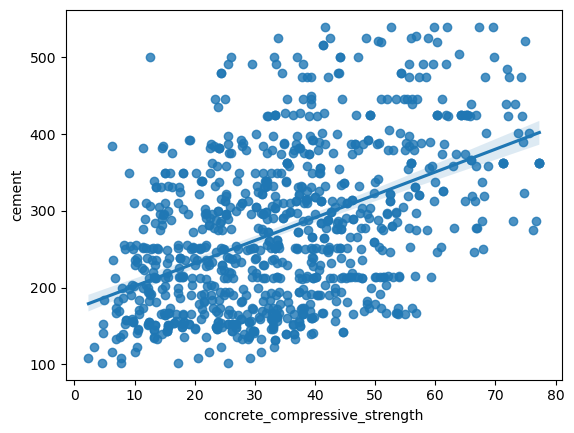

In [36]:
sns.regplot(df.concrete_compressive_strength,df.cement)

In [37]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [38]:
x=df.cement
y=df.concrete_compressive_strength
from numpy import array
x=array(x)
y=array(y)

# importing train_test_split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3)

# reshaping data using reshape(-1,1)

In [40]:
X_train=X_train.reshape(-1,1)

In [41]:
y_train=y_train.reshape(-1,1)

In [42]:
X_test=X_test.reshape(-1,1)

# using LinearRegression and .fit

In [43]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### intercept of data

In [44]:
print("Slope:",regressor.intercept_)

Slope: [14.07216863]


## Slope of data

In [45]:
print("Slope:",regressor.coef_)

Slope: [[0.07342584]]


## Using .predict to predict X_test

In [46]:
y_predict=regressor.predict(X_test)

In [47]:
y_predict

array([[38.96352891],
       [26.81155214],
       [29.68250254],
       [38.88276049],
       [40.13834238],
       [42.48796931],
       [31.23913038],
       [50.12425683],
       [24.35178645],
       [39.77121317],
       [31.5548615 ],
       [24.64548981],
       [23.0741768 ],
       [28.02307852],
       [30.40207579],
       [28.28006897],
       [29.67515996],
       [25.7175071 ],
       [33.15554485],
       [31.23913038],
       [28.90418862],
       [32.42862902],
       [31.56220409],
       [31.40066723],
       [36.83417951],
       [28.75733694],
       [52.25360623],
       [40.69637877],
       [28.07447661],
       [42.48796931],
       [42.92852436],
       [29.7485858 ],
       [24.44724004],
       [29.64578962],
       [36.83417951],
       [29.76327097],
       [45.27815129],
       [29.77061355],
       [38.59639971],
       [26.3636545 ],
       [32.44331418],
       [26.26820091],
       [35.95306941],
       [36.83417951],
       [41.53343337],
       [24

In [48]:
y_test=y_test.reshape(-1,1)
y_test

array([[31.84],
       [53.77],
       [13.33],
       [35.1 ],
       [55.45],
       [45.9 ],
       [22.84],
       [33.49],
       [35.23],
       [29.98],
       [44.3 ],
       [29.87],
       [33.19],
       [42.33],
       [29.45],
       [32.63],
       [31.64],
       [27.68],
       [49.77],
       [10.38],
       [15.07],
       [42.35],
       [26.91],
       [47.78],
       [27.83],
       [30.44],
       [60.28],
       [71.3 ],
       [26.4 ],
       [22.75],
       [48.79],
       [45.94],
       [29.89],
       [12.47],
       [33.69],
       [45.71],
       [36.3 ],
       [17.84],
       [44.33],
       [41.2 ],
       [19.35],
       [10.76],
       [42.64],
       [ 9.87],
       [39.05],
       [29.07],
       [67.87],
       [61.24],
       [41.37],
       [50.46],
       [38.6 ],
       [12.25],
       [20.77],
       [54.6 ],
       [28.6 ],
       [18.03],
       [55.02],
       [35.87],
       [26.15],
       [23.22],
       [31.25],
       [23.84],
       [

# Residuals 

In [49]:
residual=y_test-y_predict

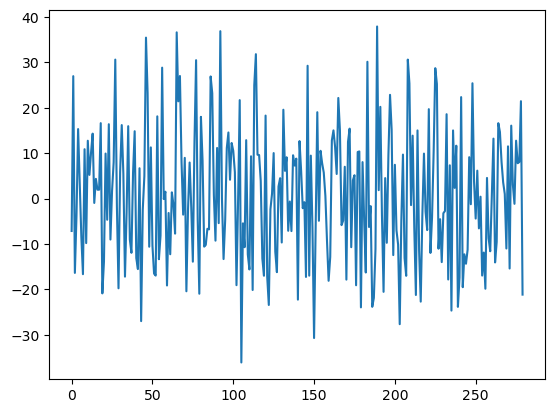

In [50]:
plt.plot(residual)

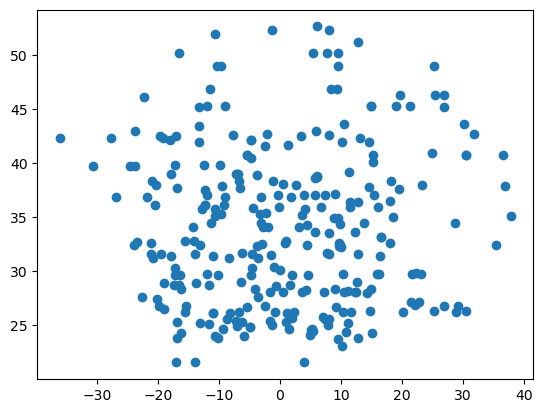

In [51]:
plt.scatter(residual,y_predict)

### checking the mean_squared_error

In [52]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_predict)

213.5374883939827

In [53]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 12.131378795705272
Mean Squared Error: 213.5374883939827
Root Mean Squared Error: 14.612921966327702


In [54]:
from sklearn.metrics import r2_score
print("R-squared Error:", metrics.r2_score(y_test, y_predict))

R-squared Error: 0.2216845512555926
